# Was bringen die Optimierungen und was die Wahl des Algorithmus?

In den vorangegangenen Modulen haben Sie sich mit Optimierungen auseinandergesetzt. Sie haben gesehen, dass nicht jeder Algorithmus in jeder Situation geeignet ist und dass auch ein vermeintlich langsamer Sortieralgorithmus wie Insertion- oder Bubblesort bei einer fast sortierten Liste eine gute Wahl sein kann – besser sogar als Mergesort.

Dieses Notebook soll Ihnen zeigen, wieviel Sie eigentlich gewinnen. 

* Wie viel gewinnen Sie, wenn Sie Bubblesort optimieren?
* Und wie viel schneller ist Mergesort?

Hier werden Sie graphisch sehen, wie gross der Unterschied zwischen der Bruteforce-Umsetzung und den Optimierungen von Bubblesort ist und wie viel schneller Mergesort (in der Regel) ist.

Sie müssen hier nicht selbst aktiv werden, aber Sie können auch die Anzahl Elemente verändern und damit beobachten, wie sich die Optimierung oder der Algorithmus mit der Zeit auswirkt. Dazu können Sie jeweils den Wert der Variable `anzahl_elemente` anpassen.

Sehen Sie sich auch den [Vergleich der berühmtesten Sortieralgorithmen auf Toptal](https://www.toptal.com/developers/sorting-algorithms) an.

## Bubblesort

Hier wird die Anzahl Vergleiche dargestellt. 

Formal ausgedrückt kommen Sie mit den Lösungen des Notebooks Bubblesort.ipynb auf die folgenden Formeln für die Anzahl Vergleiche:

* Brute Force (also ohne Optimierungen): $laenge^2-laenge$
* Erste Optimierung (einsortierte Elemente werden nicht mehr berücksichtigt): $\frac{laenge^2-laenge}{2}$
* Zweite Optimierung (abbrechen, sobald in einem Durchgang keine Tausche mehr nötig waren): im besten Fall: $laenge$

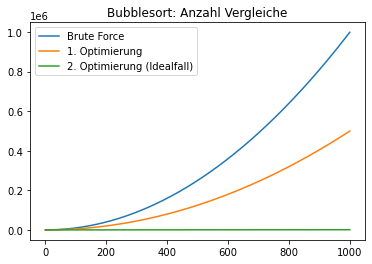

In [1]:
import numpy as np
import matplotlib.pyplot as plt

anzahl_elemente = 1000
laenge = np.arange(1, anzahl_elemente + 1, 1)

# Bubblesort ohne Optimierung: 
bubble_brute_force = laenge**2 - laenge
plt.plot(laenge, bubble_brute_force, label='Brute Force')
plt.legend()

# Bubblesort mit Optimierung 1: 
bubble_opt = (laenge**2 - laenge) / 2
plt.plot(laenge, bubble_opt, label='1. Optimierung')

# Bubblesort im allerbesten Fall:
# (zweite Optimierung, Spezialfall: bereits sortierte Liste)
bubble_opt_ideal = laenge
plt.plot(laenge, bubble_opt_ideal, label='2. Optimierung (Idealfall)')
plt.legend()

plt.title("Bubblesort: Anzahl Vergleiche")
plt.show()

## Mergesort

### Aufteilen: $\log_{2}(laenge)$

<img src="bilder/split.png" width="50%"/>
Ausgehend von der Definition des Logarithmus kommen Sie auf die folgende Anzahl &laquo;Aufteilungen&raquo; (&laquo;Splits&raquo;): 

$b^{y}=x \Leftrightarrow y = \log_{b}(x)$

- $b$: Basis, hier: 2
- $x$: Länge des Arrays
- $y$: Anzahl der &laquo;Aufteilungen&raquo; (&laquo;Splits&raquo;)

$2^{splits}=laenge \Leftrightarrow splits = \log_{2}(laenge)$

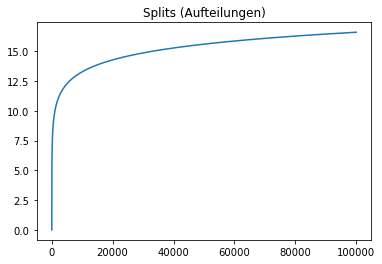

In [2]:
anzahl_elemente = 100000
laenge = np.arange(1, anzahl_elemente + 1, 1)

# Aufteilen:
splits = np.log2(laenge)
plt.plot(laenge, splits)

plt.title("Splits (Aufteilungen)")
plt.show()

### Zusammensetzen

Nun müssen die Teile zusammengesetzt werden

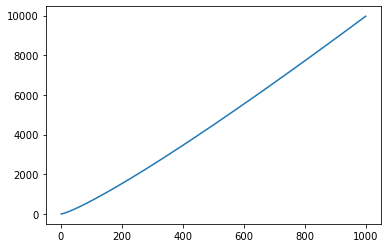

In [3]:
anzahl_elemente = 1000

laenge = np.arange(1, anzahl_elemente + 1, 1)
splits = np.log2(laenge)

# Aufteilen und zusammensetzen: 
plt.plot(laenge, laenge*splits)

plt.show()

## Direktvergleich Bubble- und Mergesort

Hier reichen Ihnen bereits zehn Elemente, um einen grossen Unterschied zu sehen. 

Obwohl Sie Bubblesort um die Hälfte halbieren konnten, ist Mergesort schneller.

Wenn Sie aber Mergesort auf eine bereits sortierte Liste anwenden, ist Bubblesort noch schneller als Mergesort, sofern Sie erkennen, wenn die Liste sortiert ist. Dieser Spezialfall wird hier für den Vergleich ebenfalls dargestellt.

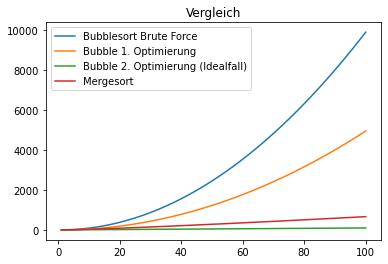

In [4]:
anzahl_elemente = 100
laenge = np.arange(1, anzahl_elemente + 1, 1)

# Bubblesort (ohne Optimierung)
bubble_brute_force = laenge**2 - laenge
plt.plot(laenge, bubble_brute_force, label='Bubblesort Brute Force')

# Bubblesort (mit Optimierung)
bubble_opt = (laenge**2 - laenge) / 2
plt.plot(laenge, bubble_opt, label='Bubble 1. Optimierung')

# Bubblesort im allerbesten Fall:
# (zweite Optimierung, Spezialfall: bereits sortierte Liste)
bubble_opt = (laenge-1)
plt.plot(laenge, bubble_opt, label='Bubble 2. Optimierung (Idealfall)')

# Mergesort
splits = np.log2(laenge)
# Die Splits könnten Sie auch plotten; Der Graph würde der binären Suche entsprechen
# plt.plot(laenge, splits, label='Splits')
plt.plot(laenge, laenge * splits, label='Mergesort')

plt.title("Vergleich")
plt.legend()
plt.show()